In [1]:
import pandas as pd

In [2]:
import os
os.chdir(r"C:\Users\HP\Downloads")

In [3]:
df=pd.read_csv("device_data_1.xls - Sheet0.csv")

In [4]:
df

,Time,Devicename,Temperature,TDS,PH,DO
0,Wed Jul 07 2021 14:15:09 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,13.61598,9.91
1,Wed Jul 07 2021 14:16:14 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,13.12313,9.90
2,Wed Jul 07 2021 14:17:18 GMT+0530 (India Stand...,867378035207325,29.0000,0.0000,13.55723,9.90
3,Wed Jul 07 2021 14:18:23 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,14.00000,9.90
4,Wed Jul 07 2021 14:19:28 GMT+0530 (India Stand...,867378035207325,29.0625,0.0000,14.00000,9.90
...,...,...,...,...,...,...
1145,Wed Jul 28 2021 17:31:18 GMT+0530 (India Stand...,867378035207325,30.0625,127.5950,14.00000,7.84
1146,Wed Jul 28 2021 17:32:23 GMT+0530 (India Stand...,867378035207325,30.0625,125.1168,14.00000,7.16
1147,Wed Jul 28 2021 17:33:28 GMT+0530 (India Stand...,867378035207325,30.1250,141.9695,14.00000,6.79
1148,Wed Jul 28 2021 17:34:32 GMT+0530 (India Stand...,867378035207325,30.1250,142.7360,14.00000,6.50


In [5]:
df=df.drop(columns=["Time","Devicename"])

In [6]:
df

,Temperature,TDS,PH,DO
0,29.0625,0.0000,13.61598,9.91
1,29.0625,0.0000,13.12313,9.90
2,29.0000,0.0000,13.55723,9.90
3,29.0625,0.0000,14.00000,9.90
4,29.0625,0.0000,14.00000,9.90
...,...,...,...,...
1145,30.0625,127.5950,14.00000,7.84
1146,30.0625,125.1168,14.00000,7.16
1147,30.1250,141.9695,14.00000,6.79
1148,30.1250,142.7360,14.00000,6.50


In [10]:
import seaborn as sns

# Exploratory Data analysis

#### Data preprocessing
### No missing values

In [11]:
df.describe()

,Temperature,TDS,PH,DO
count,1150.000000,1150.000000,1150.000000,1150.000000
mean,26.042283,110.163128,5.813235,3.270148
std,1.265751,57.359872,1.716083,1.345019
min,24.875000,0.000000,4.875184,1.070000
25%,25.500000,124.877675,5.312549,2.610000
50%,25.687500,133.931700,5.413732,3.100000
75%,25.812500,136.523500,5.524703,3.450000
max,34.750000,744.276200,14.000000,9.940000


In [12]:
df.corr()


,Temperature,TDS,PH,DO
Temperature,1.000000,0.103749,0.650587,0.669232
TDS,0.103749,1.000000,-0.006967,-0.209506
PH,0.650587,-0.006967,1.000000,0.702880
DO,0.669232,-0.209506,0.702880,1.000000


In [13]:
output=df["DO"]
df=df.drop(columns=["DO"])

<AxesSubplot:ylabel='TDS'>

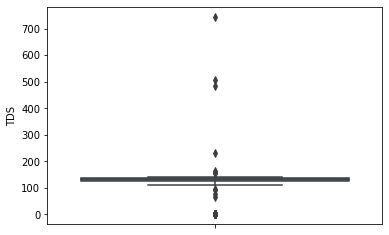

In [14]:
import seaborn as sns
sns.boxplot(y='TDS',data=df)

In [15]:
df.isnull().sum()

Temperature    0
TDS            0
PH             0
dtype: int64

### performed feature scaling i.e  standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
sdf=pd.DataFrame(scaler.transform(df))

In [17]:
sdf

,0,1,2
0,2.387145,-1.921396,4.548814
1,2.387145,-1.921396,4.261494
2,2.337746,-1.921396,4.514564
3,2.387145,-1.921396,4.772688
4,2.387145,-1.921396,4.772688
...,...,...,...
1145,3.177534,0.304036,4.772688
1146,3.177534,0.260813,4.772688
1147,3.226933,0.554747,4.772688
1148,3.226933,0.568116,4.772688


### divided data into training data(80%) and test data(20%)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sdf,output,test_size=0.2, random_state=42)

### after analyzed various machine learning models .random forest model is giving good results

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9123123958403652

In [25]:
pred=regressor.predict(X_test)
pred

array([2.5639    , 2.1433    , 3.0352    , 2.2076    , 3.19187   ,
       2.3934    , 3.2569    , 3.1068    , 2.942     , 2.9715    ,
       2.3298    , 3.3676    , 3.14166667, 2.9622    , 2.127     ,
       2.9732    , 3.26082667, 2.9419    , 2.48642976, 3.37603571,
       3.3926    , 3.1777    , 2.2927    , 3.66395214, 3.3812    ,
       3.0806    , 3.4114    , 1.7505    , 5.5879    , 2.86935   ,
       3.29045   , 6.501     , 1.9976    , 6.7769    , 2.07      ,
       3.2422    , 5.7809    , 3.2738    , 3.0365    , 3.1392    ,
       3.139     , 3.2056    , 4.2153    , 3.5667    , 3.576     ,
       2.96956667, 2.2342    , 2.818     , 2.8665    , 3.03093333,
       3.39746667, 3.2417    , 3.7492    , 6.7679    , 5.2611    ,
       3.2543    , 2.5701    , 3.0254    , 3.6916    , 5.2269    ,
       3.2504    , 1.9931    , 2.1437    , 2.8919    , 1.5894    ,
       1.9994    , 2.9357    , 2.6385    , 2.87478667, 2.0736    ,
       3.2257    , 3.0491    , 1.6163    , 2.532     , 3.32825

### anay

In [226]:
from sklearn.metrics import mean_squared_error
errors =mean_squared_error(pred,y_test)

In [227]:
errors

0.12784684869971072

In [196]:
import pickle
# open a file, where you ant to store the data
file = open('do.pkl', 'wb')
file2=open("standard.pkl","wb")

# dump information to that file
pickle.dump(regressor,file)
pickle.dump(scaler,file2)




In [197]:
model = open('do.pkl','rb')
model2=open('standard.pkl','rb')
forest = pickle.load(model)


In [200]:
forest2 = pickle.load(model2)
y_prediction = forest.predict(X_test)
errors =mean_squared_error(y_prediction,y_test)

In [199]:
errors

0.24068639305058145

In [176]:
X_test

,0,1,2
174,-0.181618,0.396993,-0.187234
752,-0.181618,0.466277,-0.465043
467,-0.329815,0.459761,-0.179624
240,-0.181618,0.412955,-0.345167
667,-0.428614,0.448391,-0.242417
...,...,...,...
481,-0.329815,0.464646,-0.221484
359,-0.280416,0.453259,-0.200554
63,-0.478013,0.269402,-0.082582
388,-0.329815,0.459761,-0.240513


In [201]:
b=np.array([[30,127,7]])
sb=pd.DataFrame(forest2.transform(b))

In [202]:
sb

,0,1,2
0,3.128134,0.293658,0.691856
